In [1]:
import os
os.getcwd()

'/Users/hri/east/ML'

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [31]:
#데이터 불러오기
data = pd.read_csv("mushroom.csv")

In [32]:
data

,poisonous,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


In [33]:
data.shape
# 8124개의 데이터
# 22개의 입력 특성 + 1개의 정답데이터 = 총 23개의 컬럼

data.info()
#결측치 없음
#데이터타입 object -> 수치형 데이터로 변환하는 인코딩 과정이 필요

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   poisonous                 8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [34]:
#문제와 정답으로 분리
X = data.iloc[:, 1:]
#X = data.drop('poisonous', axis=1)
y = data['poisonous']

In [35]:
y

0       p
1       e
2       e
3       p
4       e
       ..
8119    e
8120    e
8121    e
8122    p
8123    e
Name: poisonous, Length: 8124, dtype: object

In [36]:
###데이터 전처리
# 문자열 -> 수치형
y.value_counts()
#두개의 클래스(정답종류)를 가진다

poisonous
e    4208
p    3916
Name: count, dtype: int64

In [37]:
data.describe()

,poisonous,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [38]:
X['cap-shape'].unique()

array(['x', 'b', 's', 'f', 'k', 'c'], dtype=object)

In [39]:
#cap-shape 원핫 인코딩 : 값의 크고작음에 의미가 없을때 사용(우선순위가 없을 때)
X_one_hot = pd.get_dummies(X, dtype='int')

In [40]:
X_one_hot

,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,cap-surface_y,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,0,0,0,0,0,1,0,0,1,0,...,1,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
2,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,1,0,0,0,1,...,1,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
8120,0,0,0,0,0,1,0,0,1,0,...,0,1,0,0,0,1,0,0,0,0
8121,0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
8122,0,0,0,1,0,0,0,0,0,1,...,0,1,0,0,0,1,0,0,0,0


In [41]:
###train,test 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X_one_hot, y, test_size = 0.3, random_state=2) #테스트 데이터의 비율)


In [42]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(5686, 117)
(5686,)
(2438, 117)
(2438,)


In [43]:
###모델 객체 생성 / 하이퍼파라미터 조절하지 않음
tree_model = DecisionTreeClassifier()

In [44]:
#모델 학습
tree_model.fit(X_train, y_train)

DecisionTreeClassifier()

In [45]:
#모델 평가
tree_model.score(X_train, y_train)
#과대적합 의심

1.0

In [46]:
tree_model.score(X_test, y_test)

1.0

In [47]:
pred = tree_model.predict(X_test)

In [48]:
#정확도 외 다른 지표들
from sklearn.metrics import classification_report
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           e       1.00      1.00      1.00      1298
           p       1.00      1.00      1.00      1140

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438



In [49]:
tree_model2 = DecisionTreeClassifier(max_depth=3)

In [50]:
tree_model2.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [51]:
tree_model2.score(X_train, y_train)

0.9857544846992613

In [52]:
tree_model2.score(X_test, y_test)

0.9840032813781788

In [53]:
# 우리가 보유한 데이터는 한정적임 : 데이터가 많을수록 과대적합 제어
from sklearn.model_selection import cross_val_score
# cv = 교차검증횟수
cross_val_score(tree_model2, X_train, y_train, cv = 5)

array([0.98594025, 0.98592788, 0.98416887, 0.98416887, 0.98592788])

In [ ]:
###트리 모델 내부 시각화
## 외부 라이브러리인 graphviz

import graphviz


In [61]:
import os

In [62]:
os.environ['PATH'] += os.pathsep+'/opt/homebrew/bin/dot'

In [58]:
from graphviz import Digraph

In [59]:
import graphviz

In [60]:
from sklearn.tree import export_graphviz

In [64]:
# 현재 우리가 만든 모델을 dot형태의 파일로 내보내기
export_graphviz(
    tree_model,
    out_file = 'data/tree.dot',
    class_names=['독','식용'],
    feature_names=X_one_hot.columns,
    filled = True, #각 노드들의 클래스가 구분되도록 색을
    impurity = True
    
)

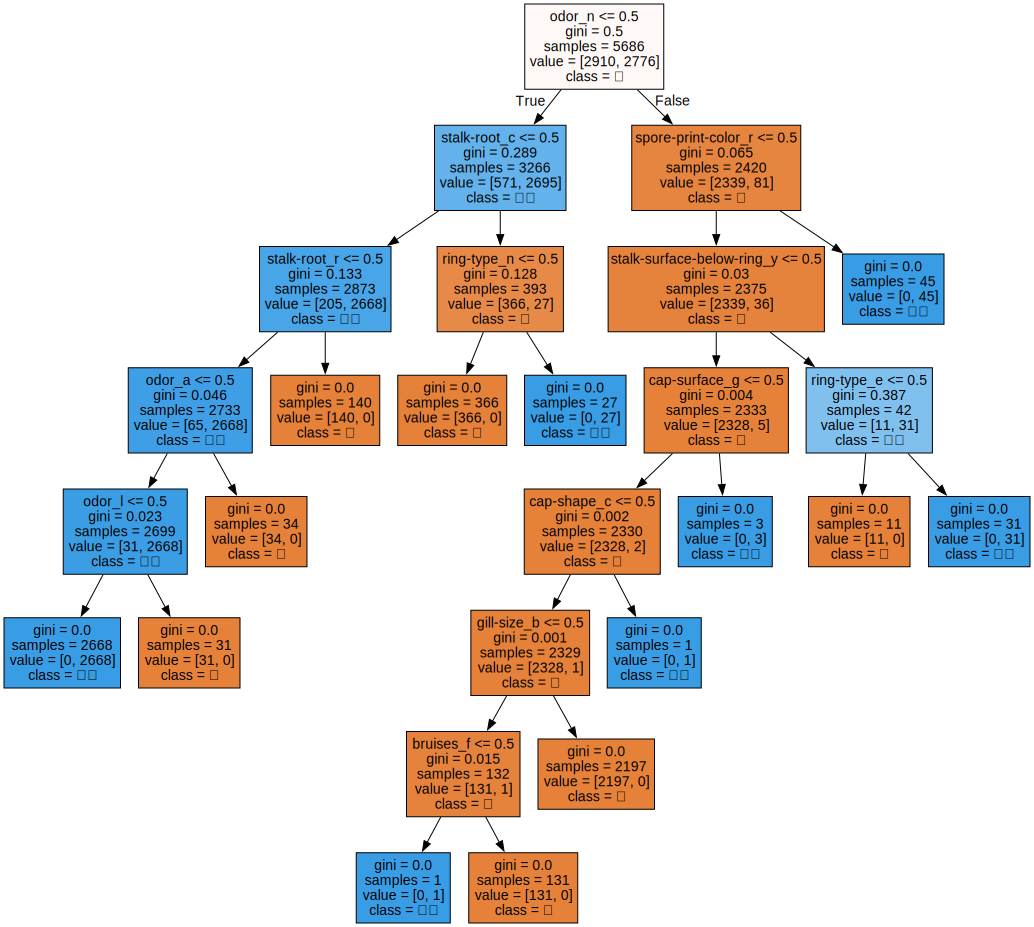

In [65]:
# dot 파일을 불러와서 실제 그래프로 표현
import graphviz
#클래스 이름을 한글로 했기 때문에, 한글 인코딩 작업
with open('data/tree.dot', encoding = 'UTF') as f:
    dot_graph = f.read()

#그래프 출력
graphviz.Source(dot_graph)

In [66]:
# 현재 우리가 만든 모델을 dot형태의 파일로 내보내기
export_graphviz(
    tree_model2,
    out_file = 'data/tree2.dot',
    class_names=['독','식용'],
    feature_names=X_one_hot.columns,
    filled = True, #각 노드들의 클래스가 구분되도록 색을
    impurity = True
    
)

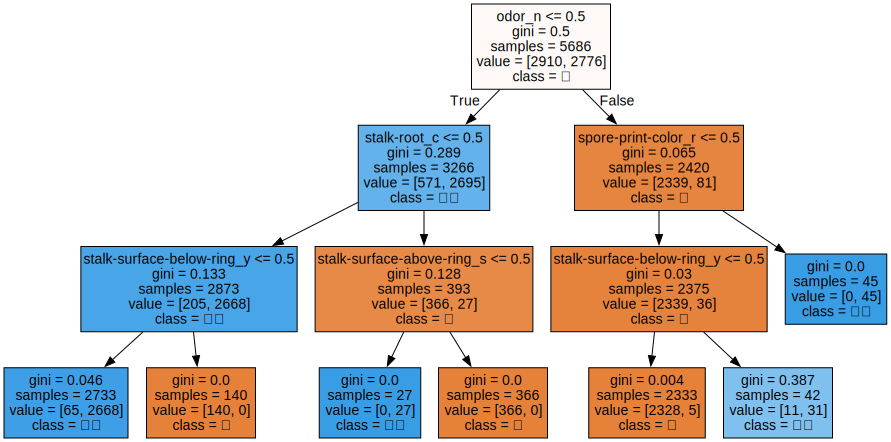

In [67]:
# dot 파일을 불러와서 실제 그래프로 표현
import graphviz
#클래스 이름을 한글로 했기 때문에, 한글 인코딩 작업
with open('data/tree2.dot', encoding = 'UTF') as f:
    dot_graph = f.read()

#그래프 출력
graphviz.Source(dot_graph)

In [ ]:
###특성 선택
## 각 특성들의 중요도를 출력(지도학습에서만 가능)
## 정답에 얼마만큼의 영향을 미치는 특성인가를 수치로 확인 가능
## 각 특성들의 중요도는 0~1 사이의 값을 가짐
## 모든 특성의 중요도의 합은 1
## tree 모델은 특성의 중요도가 높은 값을 상위질문으로 배치한다.

In [69]:
pd.set_option('display.max_rows', None) #판다스 디스플레이 옵션변경(행 다보이게)

In [77]:
#tree model 특성 중요도 확인
fi = tree_model.feature_importances_.astype(float)

In [78]:
fi_df = pd.DataFrame(fi, index = X_one_hot.columns, columns = ['특성중요도'])

In [80]:
fi_df.sort_values('특성중요도', ascending=False)

,특성중요도
odor_n,0.613250
stalk-root_c,0.179948
stalk-root_r,0.089334
spore-print-color_r,0.030150
odor_a,0.023094
odor_l,0.021569
ring-type_n,0.017699
stalk-surface-below-ring_y,0.015729
ring-type_e,0.005715
cap-surface_g,0.002105
